<a href="https://colab.research.google.com/github/LiorAbergel/Netflix-Data-Analyzer/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing modules and creating DF

Import the necessary modules

In [ ]:
# Install missing packages
!pip install swifter
!pip install textblob

# Standard Libraries
from collections import Counter
from pprint import pprint

# External Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import swifter

# NLTK Modules
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Text Analysis Libraries
from textblob import TextBlob
from wordcloud import WordCloud

# Scikit-Learn
from sklearn.datasets import fetch_20newsgroups

# NLTK Downloads
import nltk
nltk.download('punkt')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=874578b98d5721579dc199096e412c2973d2909eae88cfe1bab78ce6491eef41
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Fetch the newsgroups

In [ ]:
newsgroups = fetch_20newsgroups()

pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


Choose 2 topics

In [ ]:
cats = ['sci.space', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(categories=cats)

Create DF that contains the texts from the 2 selected topics

In [ ]:
df = pd.DataFrame()
df['text'] = newsgroups.data
df['target'] = [newsgroups.target_names[i] for i in newsgroups.target]

df.head()

,text,target
0,From: Center for Policy Research <cpr@igc.apc....,talk.politics.mideast
1,From: moroney@world.std.com (Michael Moroney)\...,sci.space
2,From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...,sci.space
3,From: tclock@orion.oac.uci.edu (Tim Clock)\nSu...,talk.politics.mideast
4,From: cosmo@pro-angmar.alfalfa.com (Frank Bens...,talk.politics.mideast


# Data overview

Counting words for each text

In [ ]:
df['word_count'] = df['text'].str.split().str.len()

Counting letters for each text

In [ ]:
df['letter_count'] = df['text'].str.len()

Calculating average word length for each text

In [ ]:
df['avg_word_len'] = df.apply(lambda row: row['letter_count'] // max(row['word_count'], 1), axis=1).astype(int)

Counting stopwords for each text

In [ ]:
stop_words = set(stopwords.words('english'))
df['stopword_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w in stop_words]))

Counting digits for each text

In [ ]:
def count_digits_in_text(text):
  return sum(1 for char in text if char.isdigit())

df['digit_count'] = df['text'].apply(count_digits_in_text)

df['digit_count'].sum()

49410

Counting upper words for each text

In [ ]:
df['upper_word_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

df['upper_word_count'].sum()

18571

Counting special chars for each text

In [ ]:
special_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '_', '+', '=', '[', ']', '{', '}', ';', '<', '>', '/', '?', '|', '\\']

# Count occurrences of special characters in the entire 'text' column
special_counts = Counter(char for text in df['text'] for char in text if char in special_chars)

# Sort the dictionary by counts in descending order
sorted_special_counts = dict(sorted(special_counts.items(), key=lambda item: item[1], reverse=True))

sorted_special_counts

{'>': 13828,
 '@': 4718,
 '|': 4360,
 '_': 4065,
 '=': 3801,
 '*': 3639,
 '?': 3120,
 '/': 2510,
 '!': 1520,
 '<': 1300,
 ']': 1127,
 '^': 1043,
 '[': 858,
 ';': 640,
 '$': 612,
 '+': 399,
 '#': 283,
 '&': 241,
 '%': 187,
 '\\': 182,
 '{': 41,
 '}': 38}

We select the chars that are more frequent and we think will have purpose in our analysis

In [ ]:
selected_special_chars = ['>', '@', '|', '_', '=', '*', '?']

for char in selected_special_chars:
  df[f'{char}_count'] = df['text'].apply(lambda x: x.count(char))

df.head()

,text,target,word_count,letter_count,avg_word_len,stopword_count,digit_count,upper_word_count,>_count,@_count,|_count,__count,=_count,*_count,?_count
0,From: Center for Policy Research <cpr@igc.apc....,talk.politics.mideast,309,2140,6,123,49,2,2,1,0,0,0,0,0
1,From: moroney@world.std.com (Michael Moroney)\...,sci.space,155,1001,6,55,2,5,8,2,0,2,0,0,3
2,From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...,sci.space,117,922,7,26,24,4,8,6,0,0,0,0,5
3,From: tclock@orion.oac.uci.edu (Tim Clock)\nSu...,talk.politics.mideast,208,1372,6,68,33,10,28,7,0,0,0,0,5
4,From: cosmo@pro-angmar.alfalfa.com (Frank Bens...,talk.politics.mideast,25,304,12,1,1,2,0,3,0,0,0,0,0


Function that gets the 10 most common and 10 least common words in all the texts

In [ ]:
def most_least_common_words(df):
  all_texts = ' '.join(df['text'])
  words = word_tokenize(all_texts)
  words = [word for word in words if word.isalnum()]
  freq_dist = FreqDist(words)

  most_common_words = freq_dist.most_common(20)
  least_common_words = freq_dist.most_common()[-20:][::-1]

  return most_common_words, least_common_words

def print_most_common_words(df):
  most_common_words, least_common_words = most_least_common_words(df)
  print("Top 20 most common words:")
  for word, frequency in most_common_words:
      print(f"{word}: {frequency}")

def print_least_common_words(df):
  most_common_words, least_common_words = most_least_common_words(df)
  print("20 Least common words:")
  for word, frequency in least_common_words:
      print(f"{word}: {frequency}")


print_most_common_words(df)
print('\n')
print_least_common_words(df)

Top 20 most common words:
the: 21430
of: 11952
to: 10428
and: 9298
a: 7109
in: 6886
I: 5319
that: 5234
is: 4805
for: 3526
it: 3394
you: 3077
was: 2954
on: 2913
are: 2633
The: 2515
not: 2461
be: 2326
they: 2106
by: 2083


20 Least common words:
bosnians: 1
frustration: 1
REASONABLE: 1
UC: 1
Helf: 1
Gavin: 1
predetermined: 1
countdowns: 1
BODIES: 1
AMID: 1
FOUGHT: 1
HEROES: 1
SEARCH: 1
PAINFUL: 1
overtime: 1
mate: 1
Oboy: 1
bothers: 1
Fascist: 1
rave: 1


# Visualization

## Word Cloud

Function that generates a word cloud

In [ ]:
def word_cloud(df, title=''):
    all_texts = ' '.join(df['text'])
    words = word_tokenize(all_texts)
    words = ' '.join([word for word in words if word.isalnum()])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    if title == '':
      col_names = ', '.join(cats)
      title = f'Word cloud for {col_names}'

    else:
      title = f'Word cloud for {title}'

    plt.title(title, fontsize=22, color='navy', fontweight='bold', pad=20)

    plt.show()

Word cloud for the first category

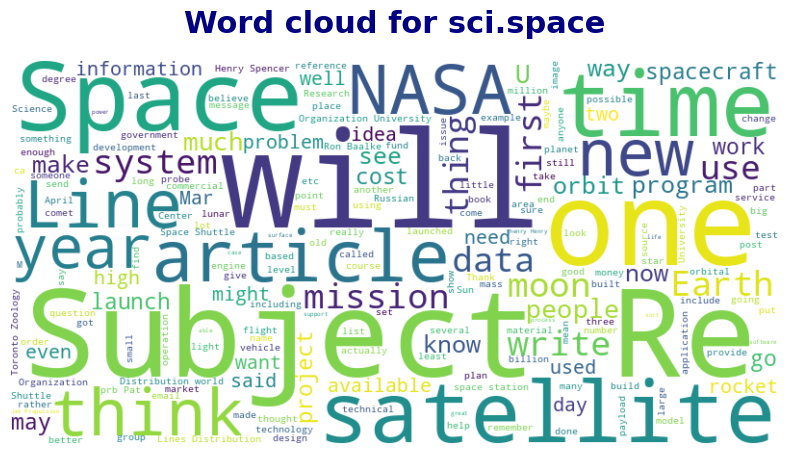

In [ ]:
word_cloud(df[df['target'] == cats[0]], cats[0])

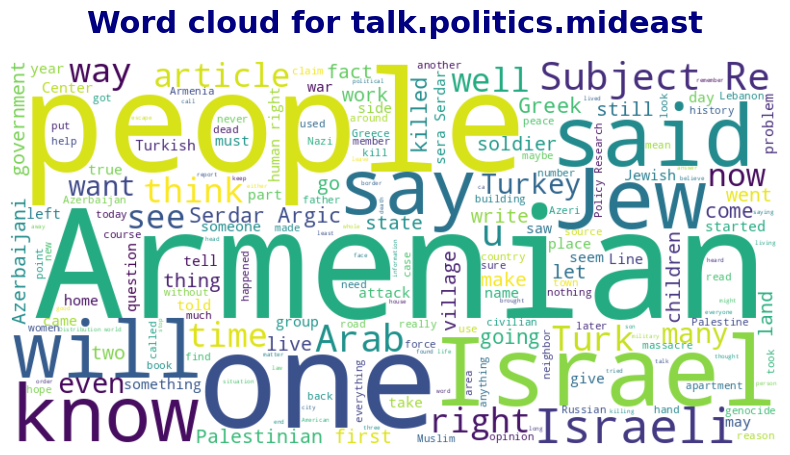

In [ ]:
word_cloud(df[df['target'] == cats[1]], cats[1])

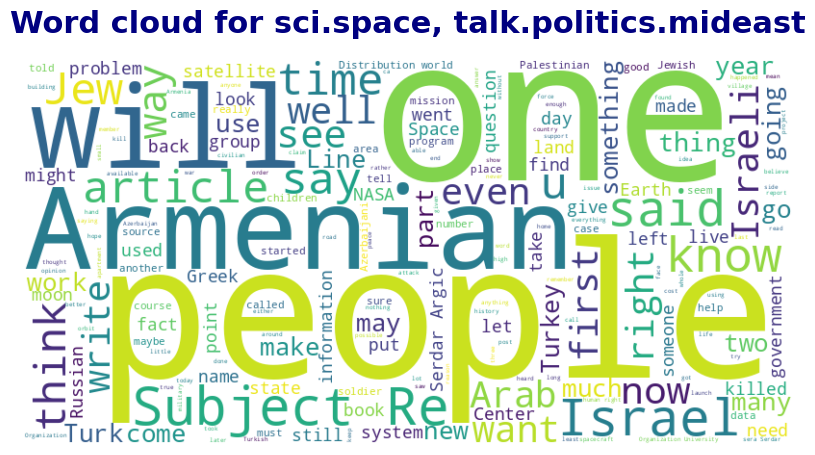

In [ ]:
word_cloud(df)

## Tree Map


In [ ]:
def tree_map(df, title=''):
    all_texts = ' '.join(df['text'])
    words = word_tokenize(all_texts)
    words = [word for word in words if word.isalnum()]
    freq_dist = FreqDist(words)

    top_words_dict = dict(freq_dist.most_common(20))
    df_count = pd.DataFrame({'word': list(top_words_dict.keys()), 'count': list(top_words_dict.values())})

    if title == '':
      col_names = ', '.join(cats)
      title = f'TreeMap of word counts for {col_names}'
    else:
      title = f'TreeMap of word counts for {title}'

    fig = px.treemap(df_count, path=['word'], values='count', title=title)
    fig.update_layout(margin=dict(t=30, b=0, l=0, r=0))

    fig.show()

In [ ]:
tree_map(df[df['target'] == cats[0]], cats[0])

In [ ]:
tree_map(df[df['target'] == cats[1]], cats[1])

In [ ]:
tree_map(df)

## Histogram


Word count

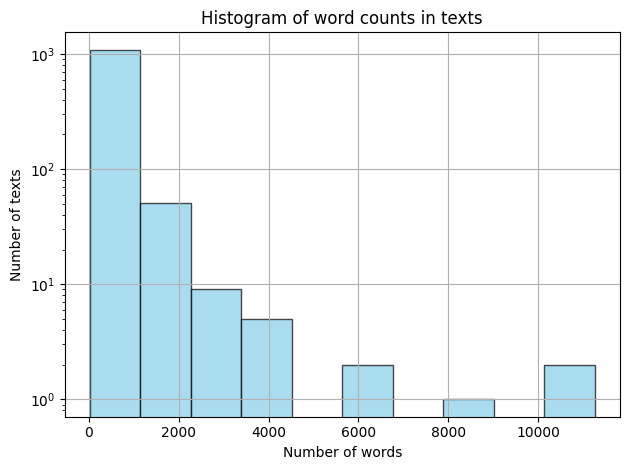

In [ ]:
def word_count_histogram(df):
    word_counts = df['word_count']

    plt.hist(word_counts, bins=10, color='skyblue', edgecolor='black', alpha=0.7, log=True)  # Adjust rwidth parameter
    plt.title('Histogram of word counts in texts')
    plt.xlabel('Number of words')
    plt.ylabel('Number of texts')
    plt.grid(True)

    plt.tight_layout()

    plt.show()


word_count_histogram(df)

Letter count


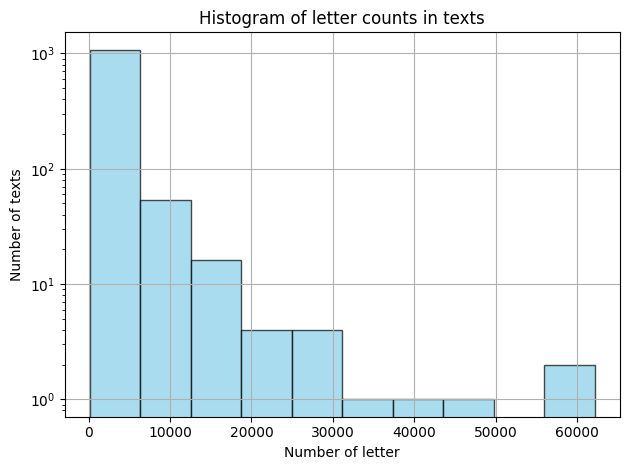

In [ ]:
def letter_count_histogram(df):
    letter_counts = df['letter_count']

    plt.hist(letter_counts, bins=10, color='skyblue', edgecolor='black', alpha=0.7, log=True)  # Adjust rwidth parameter
    plt.title('Histogram of letter counts in texts')
    plt.xlabel('Number of letter')
    plt.ylabel('Number of texts')
    plt.grid(True)

    plt.tight_layout()

    plt.show()

letter_count_histogram(df)

## ECDF

Word count

In [ ]:
def word_count_ecdf(df):
  sorted_word_counts = np.sort(df['word_count'])
  ecdf = np.arange(1, len(sorted_word_counts) + 1) / len(sorted_word_counts)

  plt.plot(sorted_word_counts, ecdf, marker='.', linestyle='none')
  plt.title('ECDF of word counts in texts')
  plt.xlabel('Number of words')
  plt.ylabel('ECDF')
  plt.show()

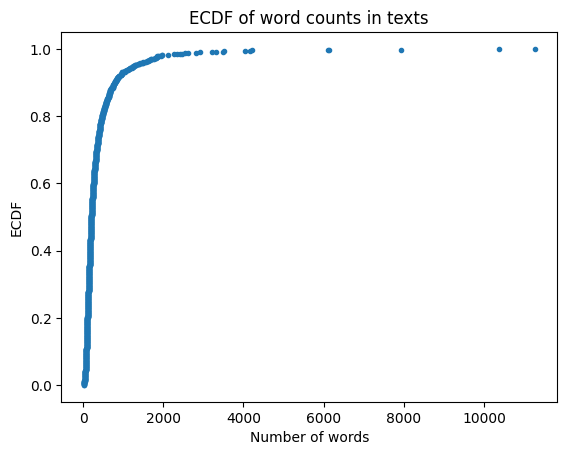

In [ ]:
word_count_ecdf(df)

Letter count

In [ ]:
def letter_count_ecdf(df):
  sorted_letter_counts = np.sort(df['letter_count'])
  ecdf = np.arange(1, len(sorted_letter_counts) + 1) / len(sorted_letter_counts)

  plt.plot(sorted_letter_counts, ecdf, marker='.', linestyle='none')
  plt.title('ECDF of letter counts in texts')
  plt.xlabel('Number of letters')
  plt.ylabel('ECDF')
  plt.show()

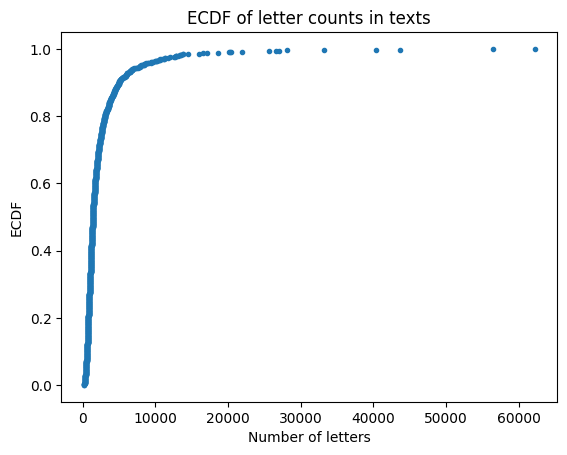

In [ ]:
letter_count_ecdf(df)

## KDE

We chose this graph to show the difference in amount of word written in upper case letters between the two categories . The grapth below shows how texts about the middle east have more upper case words
* We relate to that , talking about space is a much more soothing activity compared to talking about the middle east

In [ ]:
def upper_word_target_kde(df):
  plt.figure(figsize=(12, 8))
  for category in df['target'].unique():
      subset = df[df['target'] == category]
      sns.kdeplot(subset['upper_word_count'], label=category, fill=True)

  plt.title('Kernel Density Estimation (KDE) Plot: Uppercase Word Count by Target Category')
  plt.xlabel('Uppercase Word Count')
  plt.ylabel('Density')
  plt.legend()
  plt.show()

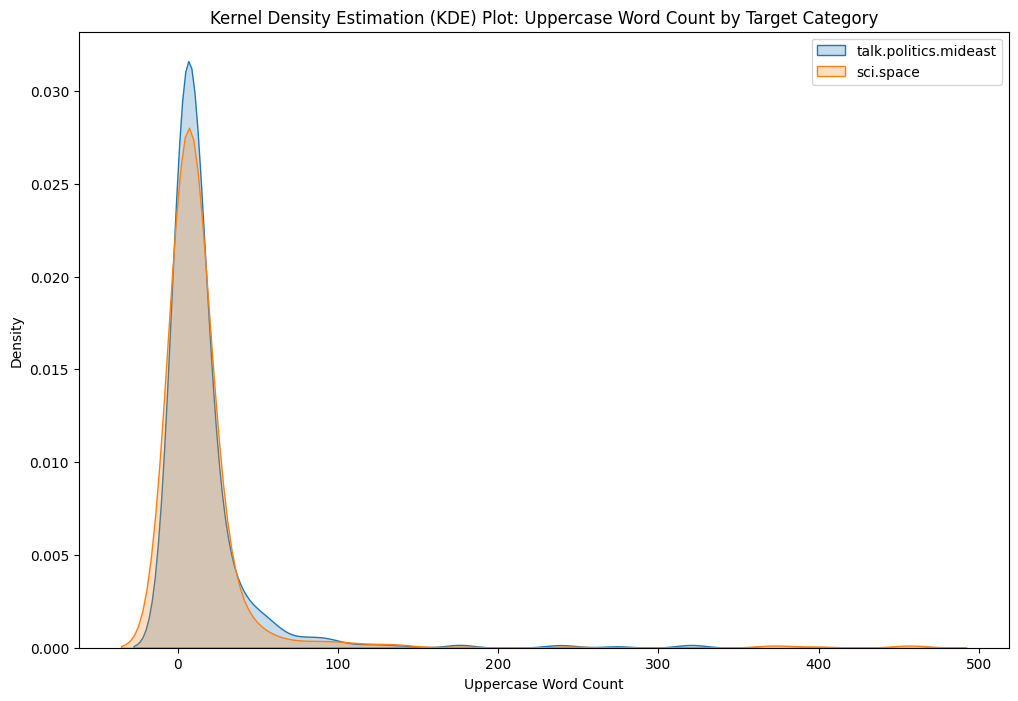

In [ ]:
upper_word_target_kde(df)

# Pre Processing


## Convert all texts to lower case letters only

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
tree_map(df)

## Remove all characters that are not a letter

In [ ]:
df['text'] = df['text'].str.replace('[^\w\s]', ' ', regex=True) # remove all chars that are not alphanumeric
df['text'] = df['text'].str.replace('[\n]', ' ', regex=True) # remove '\n' with space to avoid words concatenation

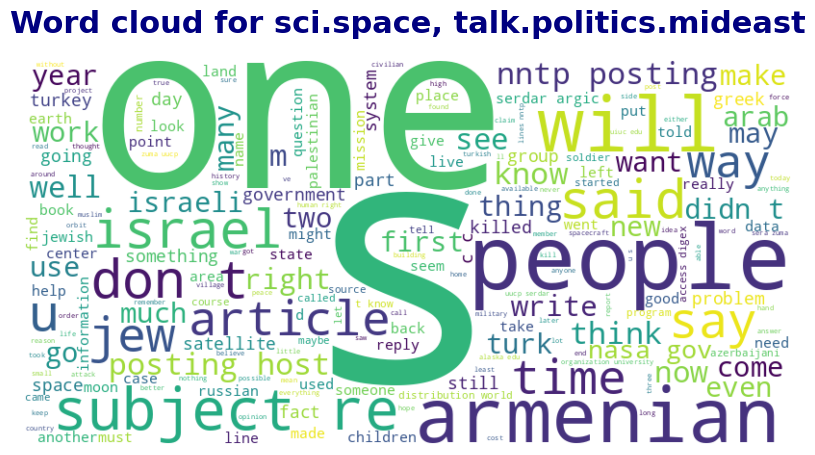

In [ ]:
word_cloud(df)

## Remove stopwords

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [ ]:
tree_map(df[df['target'] == cats[0]], cats[0])

In [ ]:
tree_map(df[df['target'] == cats[1]], cats[1])

## Most common words

We decided to take a look at common words by target , that way we'll have a better understanding of the word's context

In [ ]:
print_most_common_words(df[df['target'] == cats[0]])

Top 20 most common words:
space: 1400
edu: 1168
nasa: 737
1: 640
subject: 633
organization: 614
lines: 613
would: 553
com: 508
writes: 452
article: 439
one: 415
c: 377
gov: 358
like: 342
launch: 334
posting: 332
2: 330
moon: 300
3: 297


With space as our category , we chose these common words to remove :
edu, would, com, gov, like, subject .




In [ ]:
common_words_to_remove = ('edu', 'would', 'com', 'gov', 'like', 'subject')
for word in common_words_to_remove:
    df['text'] = df['text'].str.replace(word, '')

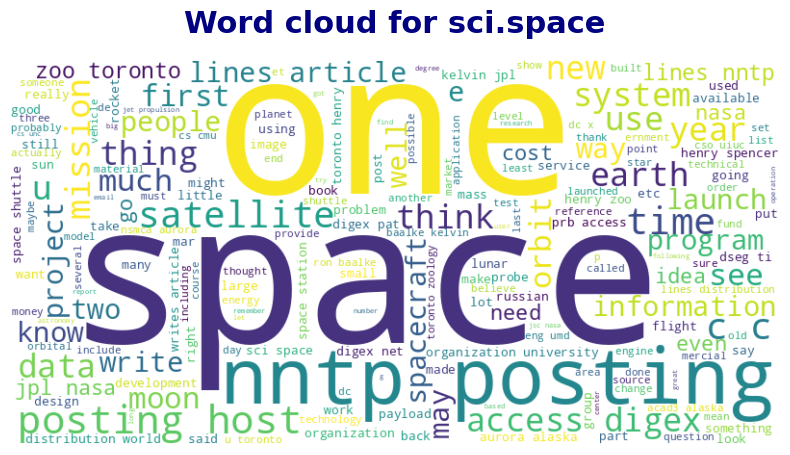

In [ ]:
word_cloud(df[df['target'] == cats[0]], cats[0])

Now we'll move on to the next category - middle east

In [ ]:
print_most_common_words(df[df['target'] == cats[1]])

Top 20 most common words:
people: 986
israel: 931
one: 852
turkish: 735
armenian: 715
israeli: 674
armenians: 621
jews: 614
said: 603
lines: 587
writes: 571
article: 555
organization: 508
know: 465
us: 454
armenia: 385
world: 356
turkey: 356
university: 354
think: 352


With middle east as our category , we chose these common words to remove :
know, us .

In [ ]:
common_words_to_remove = ('know', 'us')
for word in common_words_to_remove:
    df['text'] = df['text'].str.replace(word, '')

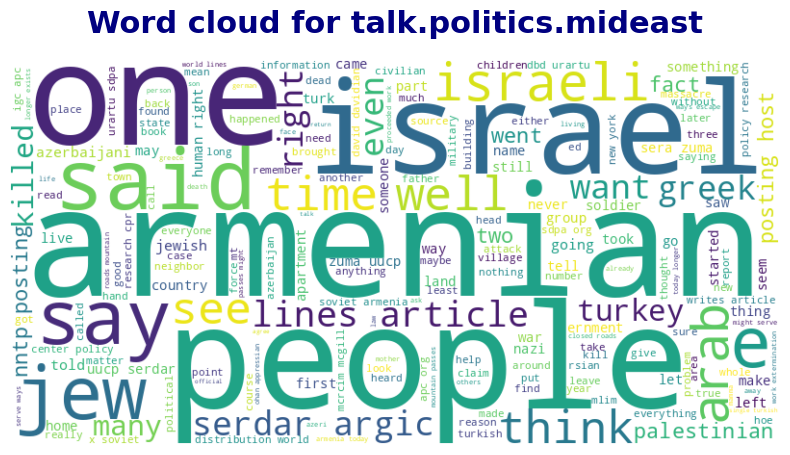

In [ ]:
word_cloud(df[df['target'] == cats[1]], cats[1])

## Least common words

In [ ]:

print_least_common_words(df)

20 Least common words:
frtration: 1
uc: 1
helf: 1
gavin: 1
predetermined: 1
countdowns: 1
overtime: 1
oboy: 1
bothers: 1
ghex: 1
terrx: 1
invokes: 1
behold: 1
cblack: 1
4108: 1
091410: 1
mutant: 1
nahh: 1
parade: 1
entreprenurial: 1


We can see that most if not all of the words are typing errors , removing them won't do any change to our data , maybe fixing the typos and coming back to this stage is more effective

## Fix Typing Errors




In [ ]:
def correct_text(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)

In [ ]:
df['text'] = df['text'].swifter.apply(correct_text)

Pandas Apply:   0%|          | 0/1157 [00:00<?, ?it/s]

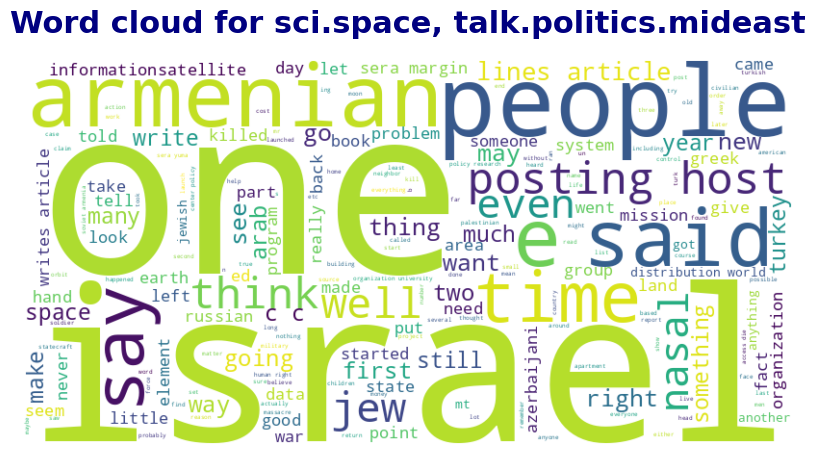

In [ ]:
word_cloud(df)

In [ ]:
tree_map(df)

# Theoretical questions

<div dir=rtl>

שאלה 1:
בקורס כריית נתונים, התנסנו בספריית pandas אך לא העמקנו יותר מדיי ולכן היה לנו ידע מאוד בסיסי.
במהלך העבודה למדנו כל מני כלים שימושיים שלא ידענו שקיימות (כגון: דיאגרמות) אשר עזרו לנו לראות את המידע שאנו מתעסקים בצורה הרבה יותר נוחה ומובנת שהקלה על העבודה עם הנתונים שלנו.


שאלה 2:
בעבודה זו התמקדנו ב- WordCloud וב-TreeMap  שבעזרתם הוקל לנו לראות את הטקסטים והקטגוריות ובכך להבינם טוב יותר ובעזרתם גילינו שבתוך המידע השימושי שלנו יתווספו כל מני דברים אשר לא נחוצים לנו, כלומר שלא רלוונטיים לניתוח הטקסטים שלנו.
בזכות הוויזואליזציות קיבלנו סקירה רחבה ומדויקת על המילים בטקסטים שלנו.


שאלה 3:
גילינו כי הסדר של השלבים מאוד רלוונטי, גילינו כי יש המון מילים שלא תורמות לנו כלל וכלל לניתוח המידע שלנו (כמו stop words ושגיאות כתיב) ולכן הגענו למסקנה שאם נעשה את תיקון שגיאות הכתיב והורדת ה- stop words לפני הניתוח נקבל מידע נקי יותר, רלוונטי יותר ואיכותי יותר, לדוגמא אם היינו מתקנים את שגיאות הכתיב לפני הניתוח של אילו מילים נדירות קיימות לנו בטקסטים, היינו מקבלים מילים משמעותיות שכן תורמות לנו מידע, להלן פלט מתוך העבודה שממחיש את זה:

```
20 Least common words:
frtration: 1
uc: 1
helf: 1
gavin: 1
predetermined: 1
countdowns: 1
overtime: 1
oboy: 1
bothers: 1
ghex: 1
terrx: 1
invokes: 1
behold: 1
cblack: 1
4108: 1
091410: 1
mutant: 1
nahh: 1
parade: 1
entreprenurial: 1
```





מכאן ניתן לראות לדוגמא ש-helf זה בעצם המילה half  בשגיאת כתיב, וכמוה יש עוד הרבה ולכן אם נתקן את השגיאות אנו נוכל להראות ולמצוא מילים נדירות ומשמעותיות.
עשינו רק 6 שלבים בעיבוד המקדים וזה עבודת עיבוד מאוד מינימאלית ואילו היינו מוסיפים עוד כל מני שלבים (כגון: lemmatization ו- stemming ) היינו מקבלים תוצאות הרבה יותר טובות ולכן לדעתנו לא צריך לדלג על אף שלב.
לדעתנו לא קיים שלב שיכול להוות חיסרון כלשהו, ניתן לבדוק זאת על ידי הסרה של השלב ולראות אם זה גורע בתוצאות שלנו או לא.


שאלה 4:
בעבודה זו השתמשנו ותרגלנו עקרונות של עיבוד מקדים לטקסט (כגון: הסרת stop words, ו- Word tokenization) ובכל מני שיטות של ויזואליזציה של המידע שלנו.
</div>

In [ ]:
# prompt: save file as html

!jupyter nbconvert --to html --execute '/content/drive/MyDrive/Colab Notebooks/Lab1.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Lab1.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
